# K-Means (base de dados simples)

### Base de dados gerada manualmente (data.csv)

In [1]:
import pandas as pd
data = pd.read_csv('data.csv', names = ['x', 'y'])
data

,x,y
0,1,2
1,2,1
2,1,1
3,2,2
4,8,9
5,9,8
6,9,9
7,8,8
8,1,15
9,2,15


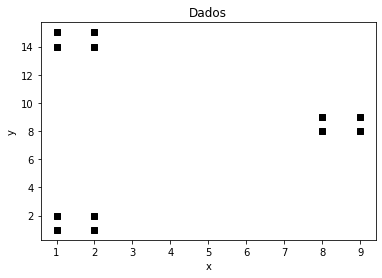

In [2]:
import matplotlib.pyplot as plt
plt.scatter(data['x'].tolist(), data['y'].tolist(), marker ='s', c = 'k')
plt.title('Dados')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Bibliotecas a serem utilizadas

In [3]:
import math
import random
import copy

### Inicialização dos centróides

In [4]:
def init_centroids(points, k):
    aux_points = copy.deepcopy(points)
    centroids = [0]*k
    centroid_0 = random.choice(aux_points)
    centroids[0] = centroid_0
    aux_points.remove(centroid_0)
    for i in range (1, k):
        dist = []
        for j in range(0, len(aux_points)):
                dist.append(math.sqrt(math.pow(aux_points[j][0] - centroid_0[0], 2) + math.pow(aux_points[j][1] - centroid_0[1], 2)))
        max_dist = None
        new_centroid = None
        for index, value in enumerate(dist):
            if max_dist == None:
                max_dist = value
                new_centroid = aux_points[index]
            else:
                if value > max_dist:
                    max_dist = value
                    new_centroid = aux_points[index]
        centroids[i] = new_centroid
        aux_points.remove(new_centroid)
    return centroids

### Atribuição dos pontos para os centróides mais próximos 

In [5]:
def assign_points(points, k, centroids):
    clusters = {}
    for point in points:
        dist = []
        for centroid in centroids:
            dist.append(math.sqrt(math.pow(point[0] - centroid[0], 2) + math.pow(point[1] - centroid[1], 2)))
        index = 0
        min_dist = dist[0]
        for i, d in enumerate(dist):
            if d < min_dist:
                min_dist = d
                index = i
        clusters.setdefault(index,[]).append(point)
    return clusters

### Atualização dos centróides

In [6]:
def update_centroids(clusters):
    means = [0]*len(clusters.keys())
    for key, cluster in clusters.items():
        mean_point = [0,0]
        counter = 0

        for point in cluster:
            mean_point[0] += point[0]
            mean_point[1] += point[1]
            counter += 1
        mean_point[0] = mean_point[0]/counter
        mean_point[1] = mean_point[1]/counter
        means[key] = mean_point
    return means

### Verificação de convergência

In [7]:
def compare_centroids(centroids, old_centroids, threshold):
    for i in range(len(centroids)):
        new = centroids[i]
        old = old_centroids[i]
        if math.sqrt(math.pow(new[0] - old[0], 2) + math.pow(new[1] - old[1], 2)) > threshold:
            return False
    return True

### Treinamento K-Means

In [8]:
def k_means(points, k):
    if len(points) < k:
        return -1
    centroids = init_centroids(points, k)
    #print(centroids)
    stop = False
    while stop == False:
        clusters = assign_points(points, k, centroids)
        #print(clusters)
        old_centroids = copy.deepcopy(centroids)
        centroids = update_centroids(clusters)
        #print(centroids)
        stop = compare_centroids(centroids, old_centroids, 0.01)
    return clusters

### Print dos clusters

In [9]:
def print_clusters(clusters):
    for key in range(0, len(clusters.keys())):
        print(f'Points in cluster #{key + 1}')
        for point in clusters.get(key):
            print(f'Point ({point[0]},{point[1]})')

### Plot dos clusters

In [10]:
def plot_clusters(clusters):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    markers = ['o', 'd', 'x', 'h', 'H', 7, 4, 5, 6, '8', 'p', ',', '+', '.', 's', '*', 3, 0, 1, 2]
    colors = ['r', 'k', 'b', 'c', 'm', 'g', 'y', [0,1,1], [1,0,0], [1,0,1], [1,1,0]]
    cnt = 0
    for cluster in clusters.values():
        x = []
        y = []
        for point in cluster:
            x.append(point[0])
            y.append(point[1])
        ax.scatter(x, y, s = 60, c = colors[cnt], marker = markers[cnt])
        cnt += 1
    plt.title('Clusters')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

### Main()

Points in cluster #1
Point (1.0,2.0)
Point (2.0,1.0)
Point (1.0,1.0)
Point (2.0,2.0)
Points in cluster #2
Point (1.0,15.0)
Point (2.0,15.0)
Point (1.0,14.0)
Point (2.0,14.0)
Points in cluster #3
Point (8.0,9.0)
Point (9.0,8.0)
Point (9.0,9.0)
Point (8.0,8.0)


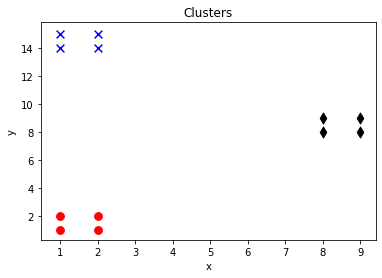

In [11]:
points = []
f = open('data.csv', 'r')
data = f.read()
rows = data.strip().split('\n')
for row in rows:
    split_row = row.split(',')
    points.append(split_row)
for point in points:
    point[0] = float(point[0].strip())
    point[1] = float(point[1].strip())

# Rodando o algoritmo K-Means
clusters = k_means(points, 3)
print_clusters(clusters)
plot_clusters(clusters)